# 개요

- 연구목표
  - 데이터 : 댓글
  - 학습 : 기존 댓글을 학습 (인덱스, 내용, 긍정/부정)
  - 긍정의 글과 부정의 글을 학습하여, 새로은 글을 보고 부정적인지, 긍정적인지 예측하겟다
    - 이 모델을 활용하면, 비호감도 판단, 해당글은 긍정인가? 부정인가?
    - 분류 모델 2개 (긍정/부정)
  - 사용기술 : 자연어 처리(텍스트)
  - RNN-LSTM

- 사용기술
  - RNN기반, RNN의 문제점을 개선한 LSTM-Cell을 사용
- 엔진
  - pytorch

# 관련 근거(주장, 목표)

- https://paperswithcode.com/

# RNN (Recurrent NN)

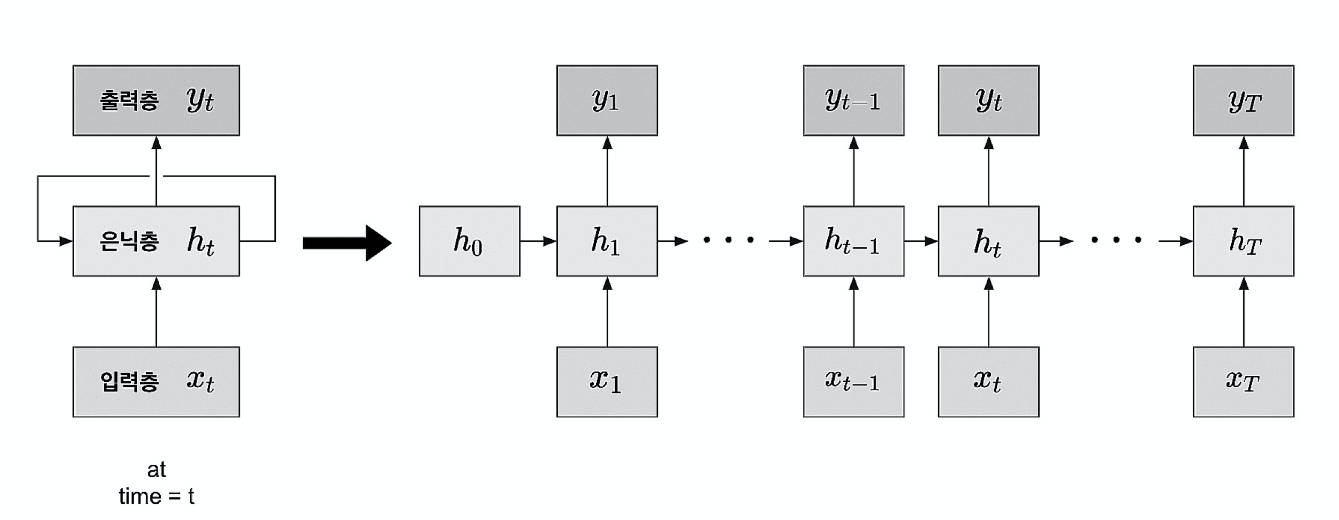

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/RNN구조.png')

# 은닉층에서 화살표가 하나 나와서 다시 은닉층으로 들어간다 -> 재귀적이다, 순환적이다
# 오른쪽 그림은 신경망을 옆으로 펼친것이다
# 왜 여러층인가? t : 시간
# 현재 시간(t)에서 훈련하는데 입력은
  # xt   : 현재 시간 입력
  # ht-1 : 이전 시간의 h(은닉층 상태값) 
# 현재 시간(t)의 출력을 구할수 있다

# 과거로 부터 이어저온 데이터가 현재에도 영향을 미친다 -> 연속적이다
# RNN은 최초의 상태로부터 미래까지 시간의 순으로 영향을 지속적으로 미치는 특성을 잡아서 만들어낸 신경망이다
# RNN은 데이터로 연속성, 시퀀스, 시간을 다루는 데이터는 모두 해당이 된다
# 시계열, 자연어(언어의 연속성) 등등이 RNN으로 처리하는 주요 데이터이다

- 코드 전략
  - 데이터 전처리 : 자연어 -> 토큰(형태소분리, 분절) -> 쪼개기 -> 수치화
  - 순환 인공 신경망 구성 : RNN < LSTM ~ GRU
  - 훈련 및 테스트 : 자연어(인코딩) -> 수치화 -> 자연어 복원(디코딩)
    - **글을 보고 이것이 긍정적인지, 부정적인지를 잘 분류해 내는 모델을 생성**
  - 음성인식  확장성
    - AI 스피커 -> 음성 -> 장치 -> 데이터 형태 -> 자연어 추출 ->    자연어(인코딩) -> 수치화 -> 인식 -> 음성 인식을 이용한 XX 서비스(자율주행, 등등...



## 순환 신경망 구성에 따른 장점

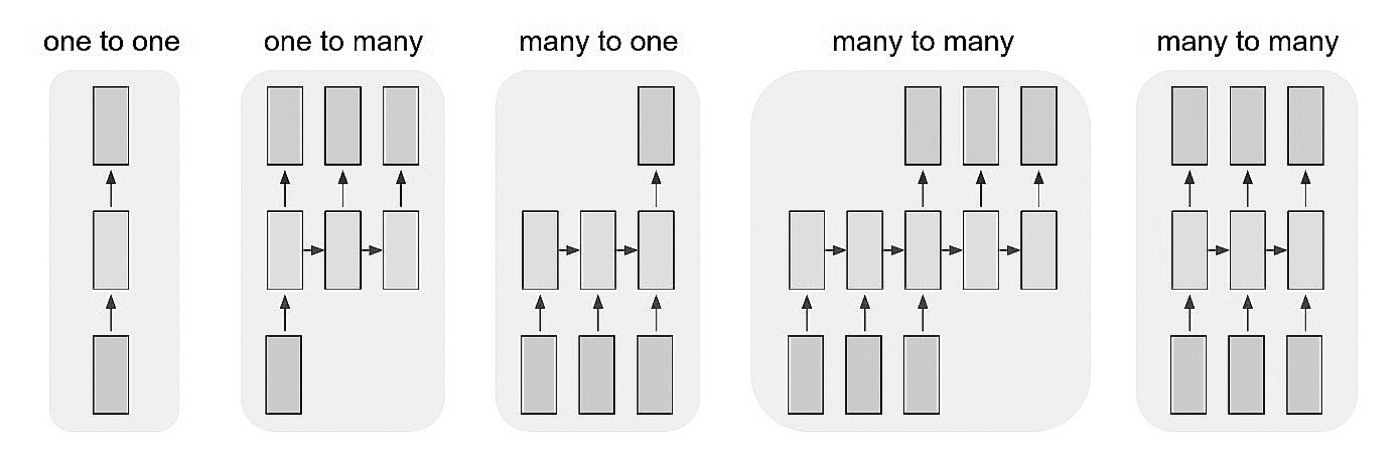

In [2]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/순환신경망의장점.png')
# RNN으로 신경망 구성시 나올수 있는 데이터(입력, 출력)의 양의 형태에 따른 케이스

- 신경망의 구성 형태에 따라, 데이터의 입력 대비 출력 형태에 따라 목적이 달라진다
- 종류
  - one  - to - one
    - 타입 스텝 (t)가 1개인 구조, 순방향 신경망 유사
  - one  - to - many
    - 입력이 한개, 출력이 여러개
    - 이미지 => 이미지 캡셔닝(라벨링, 문장의 형태로, 이미지를 설명하는 텍스트를 생성하여 출력)
  - many - to - one
    - 여러개의 입력을 주입해서 한개의 결론으로 수렴
    - 스펨 메일 분류, 감정(감성) 분류
    - 긍정/부정
  - many - to - many
    - 여러 문장을 넣어서 여러 문장을 출력
    - 챗봇, 기계번역, 문단 요약(큰글 -> 작은글, 헤드라인 문장 추출, 핵심 내용 추출, 뉴스 분야)

## 용어 정리 및 기본식

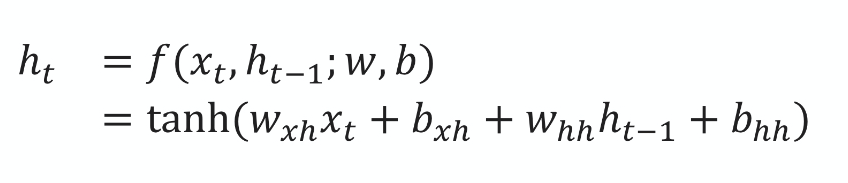

In [3]:
'''
t  : 시간, 타입 스텝(시간의 단계를 표현), t-1(이전시간), t(현재시간), t+1(다음시간)
ht : hidden layer(은닉층), 현재 시간(t)의 은닉층(의 상태값)
tanh : 활성화 함수, sigmoid의 변동폭을 -1 ~ 1(대비 2배 확장)
Wxh : 입력 x(현재 시간 t)에 대한 가중치, h(현재시간 t)는 은닉층이다
tanh( 현재시간(t)입력x * 현재시간(t)가중치 + 현재시간(t)x의편향 
      + 이전시간(t-1)가중치*은닉층상태값 + 현재상태(t)의 h의편향값 
tanh( 현재시간x*W + 현재시간편향 + 이전시간wh + 이전시간편향)
'''
Image( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/순환신경망순방향전파.png' )

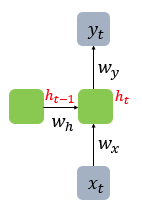

In [4]:
Image( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/rnn_f_3.png' )
# 현재 시간(t)의 ht는 총 4개의 요소를 tanh으로 처리하면 구할수 있다

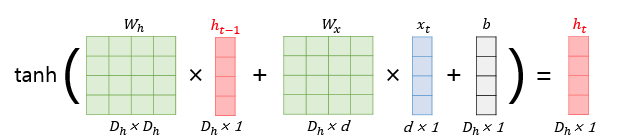

In [5]:
Image( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/rnn_f_5.png' )
# 이런 식에 근거해서 신경망을 작성 or api를 사용

## RNN 구성에 따른 신경망 확인

- cell (기억 저장소)
  - **은닉층**에서 활성화 함수를 통해서 결과를 내보내는 역활
  - 이전 은닉층에서 입력 -> 이전값을 기억하고 -> 다음 시간대에 사용 -> 메모리의 역활을 담당
  - 메모리셀 => rnn셀, **lstm셀**, gru셀 이라고 표현
  - 메모리셀은 각각의 시점(timestamp)에 이전 시점에서 들어오는 값을 현재 시점에서 입력으로 사용하는 행동을 수행하는 역활 담당

### Deep RNN (심층 순환 신경망)

- cell이 2개이상으로 구성되어 있다면
- 깊이를 주었다 => Deep을 붙인다

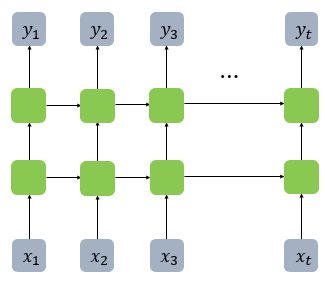

In [6]:
Image( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/rnn_f_6.png' )

###  Bidirectional RNN (양방향 순환 신경망)

- 문장을 구성하는 형태소의 앞뒤 형태소들이 어떤 긍정/부정에 의미를 판단할때 중요한 영향을 미친다
- 타입 스템 관점
  - 과거의 데이터 , t-1
  - 미래의 데이터 , t+1
  - **현재를 예측할때 과거의 데이터는 참고, 미래의 데이터응 단서가 된다**

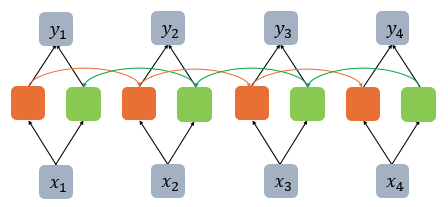

In [7]:
Image( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/rnn_f_7.png' )

### Bidirectional Deep RNN (양방향 심층 순환 신경망)

- 위의 2개의 형태를 결합한 신경망으로 본 프로젝트 진행
- **Bidirectional Deep RNN-LSTM 구조 사용**
  - LSTM-Cell 6개 사용(Deep 3 layer, Bidirectional==2)

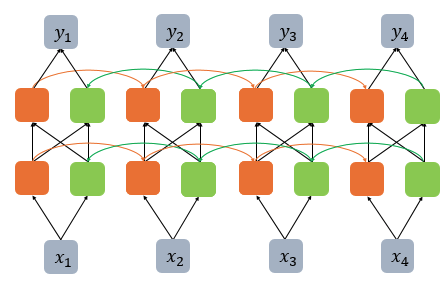

In [8]:
Image( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/rnn_f_8.png' )

# 형태소 분석기 설치 (konlpy, Mecab)

- Mecab은 일본에서 만들것을 우리나라에서 가져와서 wrapping 하여서 프로젝트를 진행했는데, 성과가 너무좋아서 그대로 채용하여 사용한 케이스

In [9]:
# Mecab 설치
# konlpy 설치
!pip install konlpy

'''
# jdk 설치
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3
'''
!java -version

'''
셀스크립트로 설치하는 방법
! bash <(curl -s https://.../mecab.sh)
'''
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

     |████████████████████████████████| 19.4 MB 36.9 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 448 kB 40.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/co

# 파이토치중 텍스트 담당 패키지 0.8.0 설치

In [10]:
# 현재 버전은 0.10.0인데, 금일 사용하는 내용 0.8.0에서 사용하는 패키지이다
!pip install torchtext==0.8.0

     |████████████████████████████████| 6.9 MB 5.3 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.10.0
    Uninstalling torchtext-0.10.0:
      Successfully uninstalled torchtext-0.10.0


In [11]:
import torch

torch.__version__

'1.9.0+cu102'

# 데이터 전처리

- 데이터 공급을 하는(훈련시, 테스트시등등 사용) class 구성
- 데이터 -> 형태소 분리(분절) -> 사전작업 -> 수치화 처리(인베딩 처리) <-> 디코딩 처리(복원)

In [12]:
# 텍스트 데이터 -> 분절, 인베딩, 공급등 처리
from torchtext.data import Field, Iterator, TabularDataset

OSError: ignored

In [ ]:
# 형태소 분석기
from konlpy.tag import Mecab

## 데이터 처리 클레스


- law 데이터를 분절, 공급, 사전, 인베딩등등 총괄 작업 진행용 클레스 구성

In [ ]:
class SentenceHelper():
  # 생성자
  def __init__(self, srcName, fmt, min_freq, batch_size):
    # 1. GPU 사용 여부
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # 2. 맴버 변수 초기화
    self.initField()
    # 3. 데이터 설정
    self.initData(srcName, fmt)
    # 4. 사전 생성
    self.createVoca(min_freq)
    # 5. 데이터 공급자 준비
    self.initLoader(batch_size)
    pass

  # 맴버변수중 Field 부분(데이터 컬럼별 처리 방식 정의) 생성
  def initField(self):
    '''
      데이터의 컬럼에 해당되는 요소를 Field에 대비해서 생성
      대상 컬럼 : id	document->text 이름변경	label
      Field의 속성
        - sequential : 이 필드에서 다루는 데이터가 시퀀스 데이터인가?
        - use_vocab  : 이 데이터를 다루는데 사전을 사용할 것인가?
        - preprocessing : 이 데이터를 전처리 할것인가? 한다면 해당 함수를 기술
        - lower      : 소문자처리(자연어에서는 통상 소문자로 처리), 한글은 무시
        - tokenize   : 문장 => 형태소 => 사전 구성 : 형태소 분석기 필요하다
        - batch_first: ( batch, h, w, ...) 배치 정보가 먼저 나오는가?
        - is_target  : 이 컬럼은 정답(레이블)인가
    '''
    self.tokenizer = Mecab() # 형태소 분석기
    self.ID    = Field(
      sequential = False,
      use_vocab  = False,
    )        
    self.TEXT  = Field(
      sequential = True,
      use_vocab  = True,
      lower      = True,
      tokenize   = self.tokenizer.morphs, # 형태소 분서기 함수 
      batch_first= True
    )
    self.LABEL = Field(
      sequential = False,
      use_vocab  = False,
      preprocessing = lambda x:int(x), # 긍/부정 값을 정수로 변환 (전처리)
      is_target  = True # 정답
      ,batch_first= True
    )
    pass

  # 데이터 주입, 읽고, 변화 처리준비
  def initData(self, srcName, fmt):
    '''
    TabularDataset : 데이터 원본을 읽어서, 파싱, 용도별로 공급
      srcName : 훈련용, 테스트용 파일 이름 [훈련용,테스트용], ()등을 이용하여 제공
    '''
    #print( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/'+srcName[1], fmt )
    
    self.train_data, self.test_data = TabularDataset.splits(
        path   = '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL', # 리소스 경로
        format = fmt, # 'tsv' or 'csv' or 'json',
        # [ (실제데이터상컬럼명, 대응하는필드 ), ... ]
        fields = [ ('id', self.ID), ('document', self.TEXT), ('label', self.LABEL) ],
        # 데이터의 첫줄을 생략?, 통상 첫번째 라인이 컬럼명이다
        skip_header = True,
        train  = srcName[0],
        test   = srcName[1]    
        )
    pass

  # 사전 생성 (형태소 -> 수치로 변환 기준)
  def createVoca(self, min_freq):
    '''
      형태소 사전을 준비
      향후 임베딩 처리시 사용 예정
    '''
    # self.TEXT
    # 전체 텍스트 데이터 중에서 소수로 나오는 형태소(1회만 등장)도 사전에 담을것인가?
    # 특정 회수 이상 등장하는 형태소만 사전에 등록하겟다 => 주류이다, 보편화 되어 있다
    self.TEXT.build_vocab( self.train_data, min_freq=min_freq )
    pass

  # 훈련, 테스트 -> 데이터 공급 기능 -> batch_size 인자 처리
  def initLoader(self, batch_size):
    '''
      훈련 및 테스트시 데이터를 배치크기만큼 공급하는 공급자 생성
    '''
    self.train_loader = Iterator(
      dataset    = self.train_data,
      batch_size = batch_size,
      device     = self.device
    )
    self.test_loader  = Iterator(
      dataset    = self.test_data,
      batch_size = batch_size,      
      device     = self.device    # gpu, cpu
    )
    pass

  # 인코딩 : 텍스트 -> 수치화(임베딩) 표현 -> 텐서
  def encode(self, src):
    '''
      텍스트 -> 수치화(임베딩) 표현
    '''
    return self.TEXT.process( [ self.tokenizer.morphs(src) ] ).to( self.device )
    pass

  # 디코딩 : 텐서 -> 수치화(임베딩) -> 텍스트(원문, 글) 
  def decode(self, src):
    '''
      수치화(임베딩) -> 텍스트(원문, 글) 
      [ 101, 34, 29, 2, ,,,,,, 1, 1, 1 ] => ['나는','추석','때','잠만','잘거다','','',...]
    '''
    return ' '.join( [ self.TEXT.vocab.itos[ ini]  for i in src ] )
    pass
  pass

  def __str__(self):
    print( f' {self.device} ')

# -------------------------------
DATA_SRC   = ['ratings_train.txt','ratings_test.txt']
DATA_FMT   = 'tsv'
VOCA_FREQ  = 2    # 2회 이상 등장만 형태소만 사전에 등재될수 있다. 설정
BATCH_SIZE = 256  # 훈련 1회시 공급하는 데이터량. 설정

dataMgr = SentenceHelper( DATA_SRC, DATA_FMT, VOCA_FREQ, BATCH_SIZE )
dataMgr, dataMgr.device

# DL 밑에 파일 새로 올렸으니까 거기서 받아서 처리하면 됩니다. 
# 파일이 맥에서 다운받아서 업로드한거라 그런지 깨지네요
# 들어오는대로 파일('ratings_train.txt','ratings_test.txt') 새로 받아서 
# 업로드후 돌려보세요 1시 5분까지 다 돌려놓으시고, 5분부터 진행합니다.

In [ ]:
# 사전에 등록된 형태소 수확인
# 사전에 등록된 형태소의 총개수 29974개
len( dataMgr.TEXT.vocab )

In [ ]:
# 배치 사이즈 및 
dataMgr.train_loader.batch_size

In [ ]:
# 데이터 개수 확인
len( dataMgr.train_loader.dataset ), len( dataMgr.test_loader.dataset )

In [ ]:
# 인코딩 테스트
en = dataMgr.encode( "뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아" )
en

In [ ]:
en.shape

In [ ]:
# 디코딩 테스트 -> 인코딩 데이터는 shape이 2차원 이상이므로, 실제 데이터 넣을때는 차원주의
# 원복은 된다 (여기에 있는 형태소는 최소 2회 이상은 데이터상에 등장했던 형태소)
# 다만, 형태소로 쪼개진것들을 복원하는 과정에 붙여쓰기 부분등은 제외
dataMgr.decode( en[0] )

## 데이터 모델을 이용하 임베딩 처리 확인

In [ ]:
'''
  형태소 3개 + 빈칸 (총개수-3)개 
  tensor([ 81, 183,   3,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])
  <pad> => 1 => 공백여백 => 전체크기 대비해서 빈공간을 패딩으로 채운다
'''
# 데이터 공급자로부터 데이터를 획득
for x in dataMgr.train_loader:
  # (batch_size, 가장긴문장의길이(매번 가변))
  print( x )
  # train_loader가 공급하는 데이터는 매번 다르고, 그 구성원들의 양도 다르고
  # 가장 길 길이를 가진 문장을 기준으로 전체 크기를 맞춘다
  input = x.document
  print( input.size() )
  print( input[0] )
  print( dataMgr.decode( input[0] )  )

  # 임베딩 테스트
  # 만약 형태소 1개를 128개의 피처로 표현하고 싶다면(가정)
  # ( 사전에 등록된 총 형태소의수, 128 )
  ems = torch.nn.Embedding( len(dataMgr.TEXT.vocab), 128 ).to( dataMgr.device )
  tmp = ems( input )
  print( tmp.size() )


  # 원문 : [256, 92]
  # 원문을 임베딩한후 : [256, 92, 128]
  # 256개의 문장(댓글)을 92개의 형태소로 최대 표현, 각각 형태소는 128개의 feature로 표현
  break



# 모델 구축(B-D-LSTM)

In [ ]:
'''
기본 사항
1. RNN-Cell의 문제점
  - 원칙 : 이전 타임 step의 은닉(h) 상태가 다음 타입 step의 은닉 상태에 영향을 미친다
  - 문제 : 
    - 타임 step이 아주 길어지면 t > t + 1 > ....... t + 1000000000000000000
    - 과거의 타임 step이 먼 미래의 타임 step에 영향을 미치는 영향성이 희소해진다
    - 장기 의존성 문제(Long Term Dependency), 경사 소실 문제
      - 이런 문제는 역전파를 통한 최적화 수행시 최초  x에 도달하지 못하는 문제도 발생
      - 이를 해결하기 위해서 LSTM-Cell, GRU-Cell 등장
      - Long Short Term Memory : 1997년도 제안
        - 단기기억정보, 장기기억정보를 이용하여 해결
      - GRU-Cell은 LSTM-Cell의 문제점(파라미터가 많다)을 줄이는 것으로 개선

LSTM-Cell 그림 설명
1. LSTM에서는 상태가 2가지가 존재
  - 장기 상태 : Long-Term state   : c
  - 단기 상태 : Short-Term state  : h
  - 장기 기억 상태에 계속해서 현 상태를 기억해 두어서, 
    아주긴 시간의 텀이 지나도, 그 영향을 유지하게 만들도록 고안되었다 
2. GATE(관문) : 현재 시간에서 기억해야할 장기 기억 상태는 3가지 상태(GaTe)로 학습이 진행된다
  - Forget Gate : Ft에 의해 제어, 장기 기억 상태에서 어떤 부분을 삭제할것인다(잊혀질것인가) 제어
  - Input  Gate : It에 의해 제어, 입력원의 특정 부분에서 어떤 부분을 더해질것인가 제어
  - Output Gate : Ot에 의해 제어, 어떤 부분을 읽어서 ht, yt로 출력하는지만 제어
3. 활성화 함수
  - 전제적으로는 logistic / sigmoid 을 사용
  - 입력에는 tanh을 사용. 최종 출력에도 tanh을 사용
'''

In [ ]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/LSTM-cell2.png')

In [ ]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/rnn_res/LSTM_Cell.png', width=600)

In [ ]:
import torch.nn as nn
import torch.optim as optim

## 신경망 구축

In [ ]:
'''
  LSTM-CEll을 기반으로 하는 양방향(2) 심층(3:설정) 순환(R) 인공 신경망(NN) 구현
'''
class SenetenceClf( nn.Module ):
  # 생성자
  def __init__(self, 
               vocab_size, embeb_size, hidden_size, num_layers,
               batch_first, bidirect, output_size):
    '''
      맴버 변수 초기화
      신경망에서 사용될 개별 요소 생성
    '''
    super( SenetenceClf, self).__init__()
    # 1. gpu, cpu
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    # 2. 필요한 부분들은 전역변수로 대체
    self.n_layers = num_layers             # deep의 크기 : 3
    self.n_direct = 2 if bidirect else 1   # 양방향(2), 단반향(1)
    self.hidden_size = hidden_size         # 은닉층의 feature 크기 128*2

    # 3. 임베딩 (29974, 128)
    self.embedding_layer = nn.Embedding( vocab_size, embeb_size ).to( self.device )

    # 4. LSTM-Cell 생성
    self.rnn_layer = nn.LSTM( 
                            input_size    = embeb_size, # 128.형태소를 표현하는 단위 크기
                            hidden_size   = hidden_size,# 128*2, 은닉층으 크기
                            num_layers    = num_layers, # 3   Deep한 크기
                            batch_first   = batch_first,
                            bidirectional = bidirect
                            ).to( self.device )

    # 5. 선형 모델 => 1개의 값에 수렴
    # ( ?, 1 )
    # 512 : hidden_size가 2개 or 설정, 체킹 예정
    self.linear = nn.Linear( 512, output_size ).to( self.device )
    pass

  # 순방향 인공 신경망 구축
  def forward(self, x):
    '''
      신경망 연결
    '''
    # 훈련 : train_loader -> x -> 수치 -> 신경망에 입력 => 훈련
    # 실제 : 문장 => 인코딩 -> x -> 수치 -> 신경망에 입력 -> 예측
    # 1. x는 수치화 되서 들어오므로, 임베딩 과정을 거친다
    # x : ( 256, 90(=변할수 있음) )
    embeded = self.embedding_layer( x )
    print( 'embeded', embeded.size() )
    # embeded : ( 256, 90(=변할수 있음), 128 )

    # 2. 은닉층과 셀을 구성
    # (셀개수(깊이*방향), 데이터개수, 은닉층크기)
    hidden, cell = self.init_hidden_cell( x.size(0), self.hidden_size )
    print( 'hidden', hidden.size() )
    print( 'cell', cell.size() )

    # 3. LSTM 구현
    #    LSTM CELL을 구현한이다. 전체 개별적인 텐서를 LSTM 구현하면서 모두 연결하였다
    output, (hidden, cell) = self.rnn_layer(embeded, (hidden, cell) )
    print( 'output', output.size() )
    print( 'hidden', hidden.size() )
    print( 'cell', cell.size() )

    # 4. 출력층에 연결
    # LSTM 구조, 심층, 양방향 => 출력층에 들어오는 입력은 2개
    # 마지막 2개만을 취해서 1차원기준으로 같은 포이젼을 가진 데이터 끼리 쌓아서
    # [ (256, 256), (256, 256) ] => (256, 512)
    last_hidden = torch.cat( [  last_h for last_h in hidden[-self.n_direct: ] ], dim=1 )
    print( 'last_hidden', last_hidden.size() )

    # 512 -> 1
    linear_data = self.linear( last_hidden )
    print( 'linear_data', linear_data.size() )
    
    print( 'linear_data.view(-1)', linear_data.view(-1) )
    print( '------------------------------ \n\n' )
    return linear_data.view(-1)
    #pass
  
  # 은닉층과 셀을 만드는 함수
  # batch_size : x의 개수
  def init_hidden_cell( self, batch_size, hidden_size ):
    '''
      cell   :  장기기억 (셀개수(깊이*방향), 데이터개수, 은닉층크기)
      hidden :  은닉층   (셀개수(깊이*방향), 데이터개수, 은닉층크기)
      망 구성하기 위해서 텐서를 생성
    '''
    hidden = torch.Tensor( self.n_layers * self.n_direct, batch_size, hidden_size )
    cell   = torch.Tensor( self.n_layers * self.n_direct, batch_size, hidden_size )
    return hidden.to(self.device), cell.to(self.device)
  pass

'''
  환경변수
'''
VOCAB_SIZE  = len( dataMgr.TEXT.vocab ) # 사전에 등록되어있는 형태소의 총개수, 29974
EMBEB_SIZE  = 128    # 형태소 1개를 몇개의 feature로 표현할 것이다. 설정
HIDDEN_SIZE = 128*2  # 은닉층의 크기, 양방향이므로 *2
NUM_LAYERS  = 3      # Deep RNN에서 레이어는 3층으로 구현. cell은 3 * 2 = 6(cell)
BATCH_FIRST = True   # 배치크기가 데이터 shape에서 맨 앞으로 나온다
BIDIRECT    = True   # 양방향성을 가지는가
OUTPUT_SIZE = 1      # 긍정(1), 부정(0)

'''
  네트워크 생성
'''
model = SenetenceClf( VOCAB_SIZE, EMBEB_SIZE, HIDDEN_SIZE, NUM_LAYERS, 
                     BATCH_FIRST, BIDIRECT, OUTPUT_SIZE )

In [ ]:
# 신경망의 볼륨 확인 -> 파라미터총수, 미세조정해야한 개수
size = 0
for param in model.parameters():
  size += param.view(-1).size(0)
  #break
print( size )

## 평가도구, 최적화, 손실등등 구현

In [ ]:
'''
  Sigmoid + BCELoss를 합친 손실함수 => 수치적으로 더 안정적인 결과를 도출

  BCELoss : Binary Crosss Entropy : 이진(분류 2개) 

'''
loss_func = nn.BCEWithLogitsLoss()

In [ ]:
'''
  - SGD
    - 확률적 경사 하강법
    - 최적의 W(가중치)를 구하기 위해서 미분을 통해서 기울기를 구한고, 이를통해서 가중치값을 계산
    - 단점> 비효율적인 경로로 갈수도 있다
  - 모멘텀
    - 운동량, 가속등 속도에 대한 가중치 부가
  - AdaGrid
    - 학습류을 줄이면서 -> 보폭량을 줄이면서 최적화하는 방향 찾는것
  - Adam
    - 모멘텀 + AdaGrid
    - 학습률도 줄이고, 속도도 계산하면서(가속, 감속등), 학습 갱싱 솓로를 조정하면서 최적화 방식
    - 가정 높은 성능을 낸다 
'''
opimizer = optim.Adam( model.parameters() )

# 훈련 및 테스트(어떤 댓글을 넣어서 판독)

In [ ]:
# 훈련, 평가등 관련기능 functional
import torch.nn.functional as F

# 반복횟수
STEP = 10

In [ ]:
for i, x in enumerate( dataMgr.train_loader ):
  input = x.document
  print( input.shape )
  label = x.label.float()
  print( label.shape, label )
  break

In [ ]:
def train(model, train_loader, loss_func, optimizer, verbose_term):
  # 훈련 시작 지식
  model.train()
  # 반복훈련 진행 
  # 1 epoch
  # train_loader 데이터를 다 출력하면 처음부터 다시 출력
  for i, x in enumerate( train_loader ):
    # 입력 데이터 : [256, 76]
    input = x.document
    # 정답 : [256]
    label = x.label.float()
    # 최적화 함수 내부 초기화
    opimizer.zero_grad()
    # 학습 (순전파)
    output = model( input )
    # 손실값 계산 : 예측값, 실제값
    loss  = loss_func( output, label) 
    # 역전파 최적화 
    loss.backward()
    # 매개변수 실반영, 업데이트 
    optimizer.step()
    # 로그출력 
    if i % verbose_term == 0:
      print( i, loss.item(), 
        100.0*( train_loader.batch_size*i )/len(train_loader.dataset)  )
    pass
  pass

In [ ]:
def test( model, test_loader ):
  # 테시트를 시작하라, 평가를 시작하라 
  model.eval()

  loss = 0.0
  acc  = 0.0
  # 테스트 하는 정보는 훈련 정보에 기록하지 않는다. 기록중지 -> 가중치에 영향을 않미침
  with torch.no_grad():
    for x in test_loader:
      input  = x.document
      label  = x.label.float()
      output = model( input )
      loss  += F.binary_cross_entropy_with_logits(output,label, reduction='sum').item()
      # 예측 ; 0 ~ 1 : 0.5 이상이면 긍정이다 판단 기준을 0.5으로 설정
      pred   = torch.sigmoid( output ).ge(0.5).float()
      # 정확도
      acc   += pred.eq( label ).sum().item()
    pass
  
  total_data_len = len( test_loader.dataset )
  # 총손실총합/총데이터개수, 총정확도총합/총데이터개수
  return loss/total_data_len, acc/total_data_len
  pass

In [ ]:
def main( model, train_loader, test_loader, loss_func, optimizer, steps,
         model_save_path, verbose_term):  
  # 로그 저장 -> 정확도
  accs       = list()
  # 최고 점수
  best_score = 0.0
  # 반복 훈련 => 에포크(세대기준)
  for step in range(steps): # 0 ~ 9 : 10회
    # 훈련
    train( model, train_loader, loss_func, optimizer, verbose_term )
    # 테스트 -> 손실(loss), 정확도(acc)
    loss, acc = test( model, test_loader )
    # 정확도 저장
    # 덤프 체크 : 현재 점수가 최고 점수를 돌파 하였는가?
    if acc > best_score:
      best_score = acc # 최고 점수 갱신
      # 모델 갱신
      best_model = model.state_dict()
    pass

  # 모델 저장
  torch.save( best_model, model_save_path )
  pass

# 학습하면서 모델을 덤프 처리를 수행하는 스타일
main( model       = model,                 # 훈련시킬 모델
     train_loader = dataMgr.train_loader,  # 훈련 데이터 공급자
     test_loader  = dataMgr.test_loader,   # 테스트 데이터 공급자
     loss_func    = loss_func,             # 손실함수
     optimizer    = opimizer,              # 최적화 도구
     steps        = STEP,                  # 반복 회수 (일반적이라면 에포크)
     # 최고 점수를 얻으면, 이때의 모델을 저장 
     model_save_path = 'best_clf.model',   # 모델이 기존 모델보다 정확도가 높으면 덤프
     verbose_term = 256                    # 로그 출력 단위  
     )

In [ ]:
# 저장된 모델을 로드한다
# 빈 껌대기로 만들어진 객체, 신경망만 구성되어 있다
oModel = SentenceClf( VOCAB_SIZE, EMBEB_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE,
                     BATCH_FIRST, BIDDIRECT).to( dataMgr.device )
# 이미 학습된 모델을 불러서, 파라미터를 주입 => 이미 학습된 알고리즘이 된다 
oModel.load_state_dict( torch.load( 'best_clf.model') )

In [ ]:
def testReview():
  # 리뷰를 입력하세요
  sentence = '''
    어쩔때 보면 정치적으로 상대방이 행하는 목적에 대해 통찰력있게 꿰뚫어 보는데, 또 가만보면 선입견을 지우지 못하는 노인네일뿐... 안철수 초선때랑 세월이 한참 흐른 경력을 갖추었을때랑 비교를 하다니... 사람은 성장하는 법. 신입사원이.. 이등병이... 세월이 지나도 똑 같지는 않을텐데...
  '''.strip()  
  # 문장의 수치화
  x        = dataMgr.encode( sentence )
  # 모델에 x를 통과
  # 기존모델
  #output   = model(x)
  # 로드된 모델
  output   = oModel(x)
  # 예측
  pred     = torch.sigmoid( output ).ge(0.5).item()
  # 판정
  # pred : 0 or 1
  print( '긍정' if pred else '부정' )
  pass

testReview()